# SIR con dinámica vital
Laboratorio 6 - parte 1

## Implementación del modelo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def sir_vital(y, t, beta, gamma, mu, N):
    S, I = y
    dSdt = mu * N - beta * S * I - mu * S
    dIdt = beta * S * I - gamma * I - mu * I
    return [dSdt, dIdt]

## Configurar la Simulación

In [3]:
N = 1000 #población total
beta = 0.5 / N #tasa de transmisión - normalizada por N
gamma = 0.1 #tasa de recuperación, periodo infeccioso de 10 días
mu = 0.02 #tasa de natalidad/mortalidad, esperanza de vida de 1/μ = 50 unidades de tiempo

In [4]:
t = np.linspace(0, 300, 1000) # Tiempo

# Condiciones iniciales
y0_brote = [999, 1]     # Inicio de brote
y0_epidemia = [700, 300] # Epidemia mayor

## Simulación de trayectoria

In [5]:
sol_brote = odeint(sir_vital, y0_brote, t, args=(beta, gamma, mu, N))
sol_epidemia = odeint(sir_vital, y0_epidemia, t, args=(beta, gamma, mu, N))

S_brote, I_brote = sol_brote[:, 0], sol_brote[:, 1]
S_epi, I_epi = sol_epidemia[:, 0], sol_epidemia[:, 1]

In [6]:
# Puntos de equilibrio
# Equilibrio libre de enfermedad (ELE)
S_ELE = N
I_ELE = 0

# Equilibrio endémico
R0 = beta * N / (gamma + mu)
S_end = (gamma + mu) / beta
I_end = mu * N * (1 - 1/R0) / (gamma + mu)

## Visualización

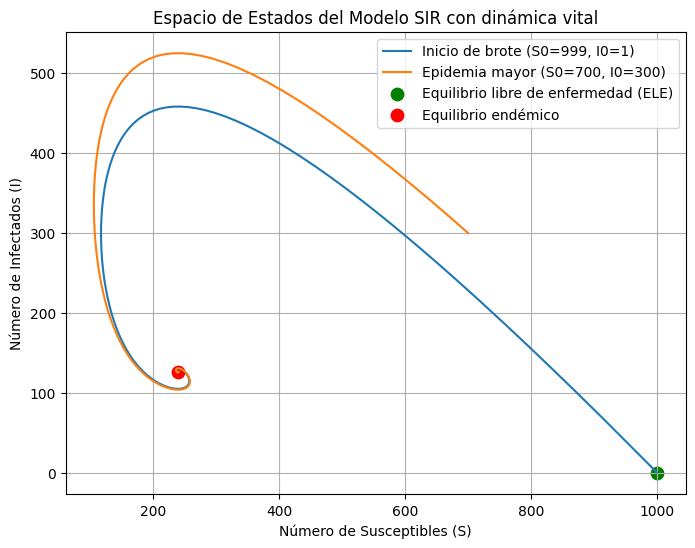

In [7]:
plt.figure(figsize=(8,6))
plt.plot(S_brote, I_brote, label='Inicio de brote (S0=999, I0=1)', color='tab:blue')
plt.plot(S_epi, I_epi, label='Epidemia mayor (S0=700, I0=300)', color='tab:orange')
plt.scatter(S_ELE, I_ELE, color='green', s=80, label='Equilibrio libre de enfermedad (ELE)')
plt.scatter(S_end, I_end, color='red', s=80, label='Equilibrio endémico')

plt.xlabel('Número de Susceptibles (S)')
plt.ylabel('Número de Infectados (I)')
plt.title('Espacio de Estados del Modelo SIR con dinámica vital')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
print(f"Punto de equilibrio libre de enfermedad (ELE): S* = {S_ELE:.2f}, I* = {I_ELE:.2f}")
print(f"Punto de equilibrio endémico: S* = {S_end:.2f}, I* = {I_end:.2f}")
print(f"R₀ = {R0:.3f}")

Punto de equilibrio libre de enfermedad (ELE): S* = 1000.00, I* = 0.00
Punto de equilibrio endémico: S* = 240.00, I* = 126.67
R₀ = 4.167
